### Imports

In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns
sns.set_style('whitegrid')

In [8]:
df = pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 25.5+ KB


In [10]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## EDA

In [11]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [16]:
import scipy.stats

c:\users\bhusalentp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


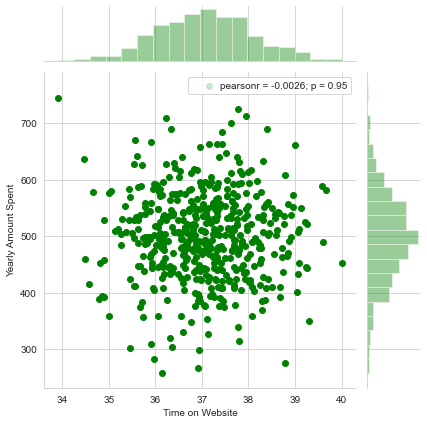

In [23]:
sns.jointplot('Time on Website', 'Yearly Amount Spent', df , color = 'green', stat_func= scipy.stats.pearsonr)

c:\users\bhusalentp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


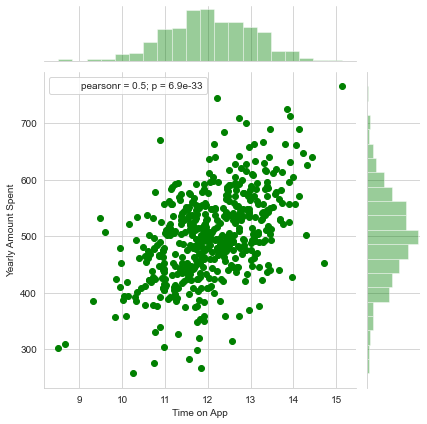

In [25]:
sns.jointplot('Time on App', 'Yearly Amount Spent', df, stat_func= scipy.stats.pearsonr, color = 'green')

c:\users\bhusalentp\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


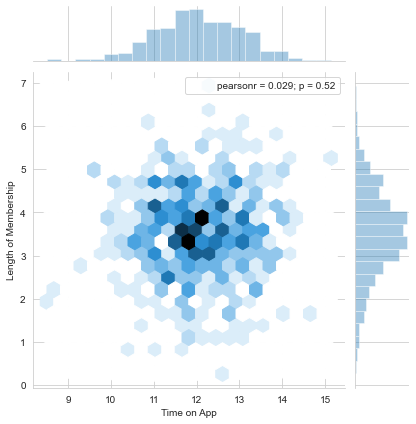

In [27]:
sns.jointplot('Time on App', 'Length of Membership', df, kind = 'hex', stat_func= scipy.stats.pearsonr)

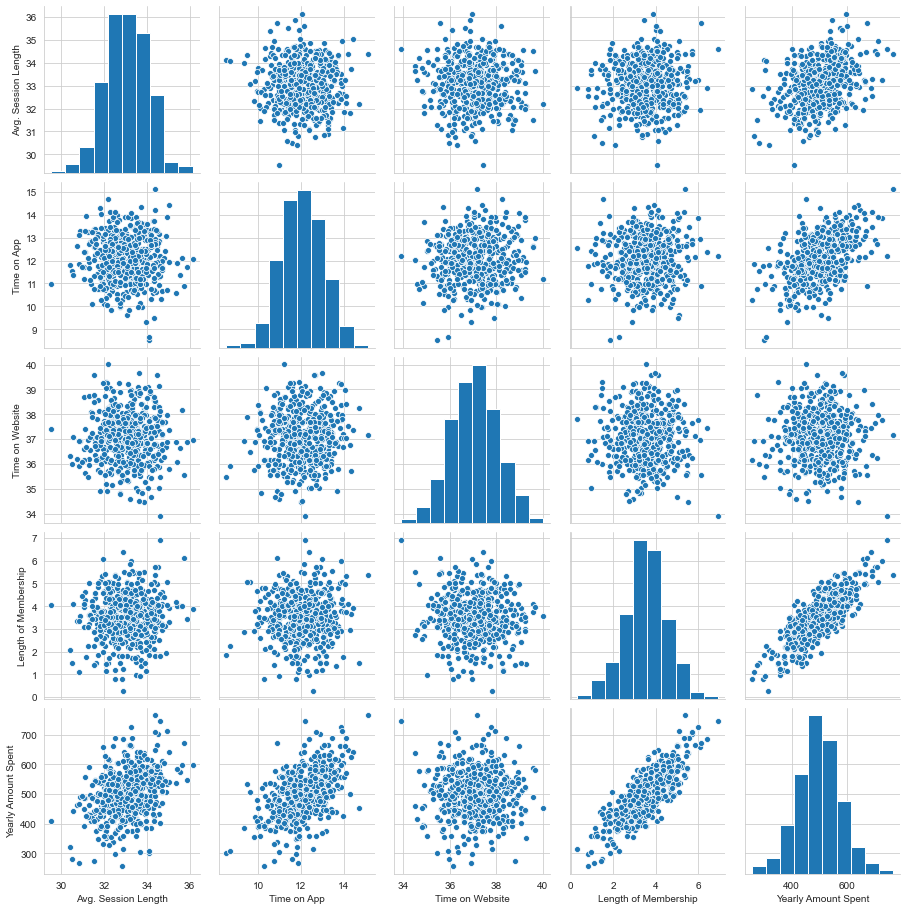

In [29]:
sns.pairplot(df)

Length of Membership is highly correlated with Yearly Amount Spent

In [30]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

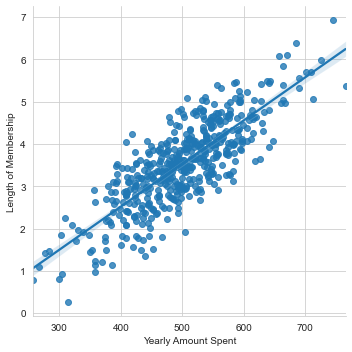

In [34]:
sns.lmplot('Yearly Amount Spent', 'Length of Membership', df)

## Training & Testing Data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [38]:
X = df.drop(axis= 1, labels = ['Yearly Amount Spent', 'Email', 'Address', 'Avatar'])
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [39]:
y = df['Yearly Amount Spent']
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(X_train, y_train)

LinearRegression()

In [44]:
lm.intercept_

-1047.932782250237

In [45]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [48]:
cdf = pd.DataFrame(lm.coef_, index = X_train.columns, columns = ['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predictions

In [52]:
predictions = lm.predict(X_test)

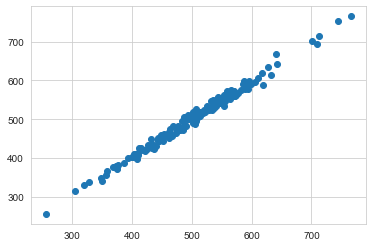

In [53]:
plt.scatter(y_test, predictions)

## Evaluating Data

In [55]:
from sklearn import metrics

In [73]:
print(f'MAE : {metrics.mean_absolute_error(y_test, predictions)}')

MAE : 7.2281486534308295


In [74]:
print(f'MSE : {metrics.mean_squared_error(y_test, predictions)}')

MSE : 79.81305165097434


In [75]:
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')

RMSE : 8.933815066978628


## Residuals

<AxesSubplot:xlabel='Yearly Amount Spent'>

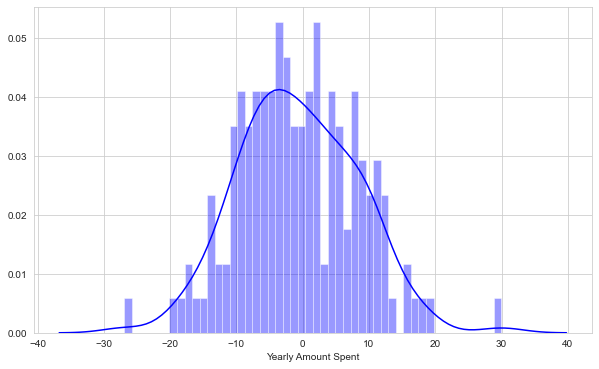

In [67]:
plt.figure(figsize = (10, 6))
sns.distplot((y_test - predictions), color = 'blue', bins = 50)

(array([ 1.,  5., 15., 34., 36., 27., 25.,  5.,  1.,  1.]),
 array([-26.95573072, -21.26030045, -15.56487019,  -9.86943992,
         -4.17400966,   1.5214206 ,   7.21685087,  12.91228113,
         18.6077114 ,  24.30314166,  29.99857192]),
 <BarContainer object of 10 artists>)

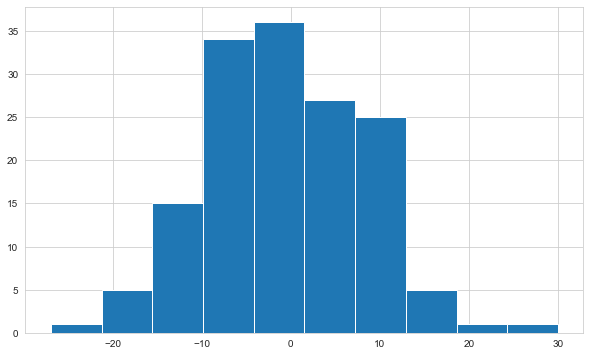

In [65]:
plt.figure(figsize = (10, 6))
plt.hist((y_test - predictions))

## Conclusions

- Company should focus on 'Ads on App'

In [71]:
r_app, p_app = scipy.stats.pearsonr(df['Time on App'], df['Yearly Amount Spent'])
r_app

0.4993277700534505

In [72]:
r_web, p_web = scipy.stats.pearsonr(df['Time on Website'], df['Yearly Amount Spent'])
r_web

-0.0026408446721589776